In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import requests

url = "https://raw.githubusercontent.com/PaulaEsteban2000/CSE151A_UrbanAnimals/main/preprocessed_df.csv"
df = pd.read_csv(url).drop(columns = "Unnamed: 0")

In [107]:
# retrieve preprocessed dataset
df

,lat,long,BIRD,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,REPTILE,...,POOR,SUMMER,SPRING,FALL,WINTER,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
0,30.494640,-91.156160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
1,30.431417,-91.141070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
2,30.648540,-91.156770,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
3,30.476015,-91.168460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
4,30.429104,-91.185036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36118,30.475130,-91.156157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
36119,30.451468,-91.187147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,1,0,0
36120,30.355068,-91.122734,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,1,0,0,0
36121,30.389151,-91.207927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0


In [108]:
df.columns

Index(['lat', 'long', 'BIRD', 'CAT', 'DOG', 'EXOTIC', 'FOWL', 'LIVESTOCK',
       'OTHER', 'REPTILE', 'WILDLIFE', 'HERDING', 'HOUND', 'MIXED',
       'NONSPORTING', 'OTHER_BREED', 'SPORTING', 'TERRIER', 'TOY', 'WORKING',
       'F', 'M', 'U', 'EXTRA LARGE', 'LARGE', 'MEDIUM', 'SMALL', 'EMACIATED',
       'EXCELLENT', 'FAIR', 'GOOD', 'POOR', 'SUMMER', 'SPRING', 'FALL',
       'WINTER', 'NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'],
      dtype='object')

In [109]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import PolynomialFeatures

x = df.drop(columns=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'])
y = df.take(range(36,41),axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)


In [110]:
y.describe()

,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
count,36123.000000,36123.000000,36123.000000,36123.000000,36123.000000
mean,0.459846,0.310827,0.203582,0.025247,0.000498
std,0.498392,0.462838,0.402667,0.156877,0.022317
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
# build feed-forward multi-layer perceptron with 4 hidden layers
def buildmodel():
    model = Sequential([
        Dense(96, activation = 'relu', input_dim = x_train.shape[1]), # input_dim = 16
        Dense(96, activation = 'tanh'),
        Dense(48, activation = 'relu'),
        Dense(48, activation = 'tanh'),
        Dense(16, activation = 'relu'),
        Dense(16, activation = 'tanh'),
        Dense(5, activation = 'softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.02), loss='mse', metrics=['mse', 'accuracy'])
    return(model)

estimator = KerasClassifier(model=buildmodel, epochs=200, batch_size=100, verbose=0, validation_split=0.1)

In [118]:
# fit model on training data
ret = estimator.fit(X=x_train, y=y_train)

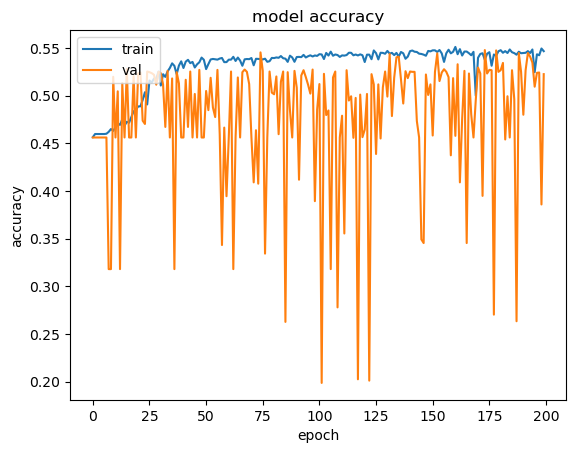

In [119]:
plt.figure()
plt.plot(ret.history_['accuracy'])
plt.plot(ret.history_['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [120]:
score_test = estimator.model_.evaluate(x_test, y_test, verbose=0)
score_train = estimator.model_.evaluate(x_train, y_train, verbose=0)

In [121]:
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[2])
print("")
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[2])

Test loss: 0.12112800031900406
Test accuracy: 0.531903088092804

Train loss: 0.11988779902458191
Train accuracy: 0.5370613932609558


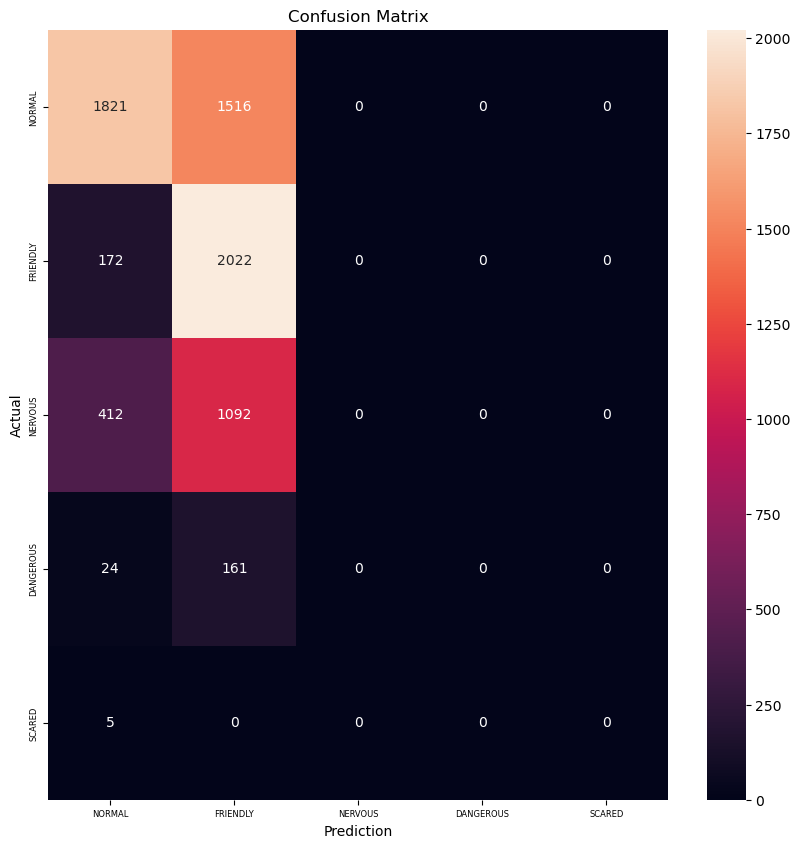

In [122]:
# predict on test and training sets
yhat_test = estimator.predict(x_test)
yhat_train = estimator.predict(x_train)
# display confusion matrix of all classes
cm = confusion_matrix(y_test.values.argmax(axis=1), yhat_test.argmax(axis=1))
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_ylim([0,6])
ax1.set_xlim([0,6])
sns.heatmap(cm,
          annot=True,
          fmt='g',
          xticklabels=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'],
          yticklabels=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'],
          ax=ax1)
plt.ylabel('Actual', fontsize=10)
plt.xlabel('Prediction', fontsize=10)
plt.title('Confusion Matrix', fontsize=12)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
plt.show()